In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import pycountry

os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray

# import pandas as pd
import modin.pandas as pd
import ray
ray.init(ignore_reinit_error=True)

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import *

In [3]:
%run ./module_P2_utils.ipynb

In [3]:
df = pd.read_csv("./tmp/df_01_cleaned.csv")

# ANALYSIS

## Outliers analysis

### Outliers for Quantitative Values

In [4]:
quantis = df.select_dtypes('float').columns
quantis

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [5]:
modes = getMultiModes(df, quantis)
modes

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

All our features have only one mode, we may expect them to follow a normal distribution, but we need to analyse deeper

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
df[quantis].agg(agg_func).T

,std,skew,kurtosis,mean,median,var,mad,prod,sum
additives_n,2.00,4.17,24.10,0.74,0.00,4.01,1.17,0.00,"1,465,271.00"
ingredients_from_palm_oil_n,0.09,11.98,148.37,0.01,0.00,0.01,0.01,0.00,"14,654.00"
ingredients_that_may_be_from_palm_oil_n,0.19,9.15,108.22,0.03,0.00,0.03,0.05,0.00,"50,710.00"
nutriscore_score,8.84,0.10,-0.94,9.10,10.00,78.16,7.63,-0.00,"6,542,034.00"
nova_group,0.97,-1.65,1.43,3.42,4.00,0.95,0.77,inf,"2,157,090.00"
energy-kcal_100g,"6,168,021,348.48","1,409.36","1,986,496.93","4,420,420.71",159.00,"38,044,487,355,293,548,544.00","8,840,398.54",0.00,"8,782,978,105,327.19"
energy_100g,"4,728,762,168,894,962,751,757,700,943,759,691,2...","1,409.58","1,986,910.00","3,354,736,192,826,493,971,880,233,424,916,578,3...",715.00,"22,361,191,649,972,191,930,514,419,693,586,095,...","6,709,469,008,815,367,551,564,496,985,632,276,4...",0.00,"6,665,558,888,888,888,950,360,610,417,759,390,8..."
fat_100g,16.66,2.47,7.79,10.78,2.68,277.62,12.02,0.00,"21,416,009.30"
saturated-fat_100g,7.15,3.82,26.63,3.89,0.50,51.11,4.74,0.00,"7,724,286.58"
carbohydrates_100g,27.35,1.03,-0.32,22.14,7.80,748.02,23.39,0.00,"43,981,371.51"


In [8]:
df[quantis].describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,"1,986,910.00",0.74,2.00,0.00,0.00,0.00,0.00,49.00
ingredients_from_palm_oil_n,"1,986,910.00",0.01,0.09,0.00,0.00,0.00,0.00,3.00
ingredients_that_may_be_from_palm_oil_n,"1,986,910.00",0.03,0.19,0.00,0.00,0.00,0.00,6.00
nutriscore_score,"718,885.00",9.10,8.84,-15.00,1.00,10.00,16.00,40.00
nova_group,"630,330.00",3.42,0.97,1.00,3.00,4.00,4.00,4.00
energy-kcal_100g,"1,986,910.00","4,420,420.71","6,168,021,348.48",0.00,0.00,159.00,365.00,"8,693,855,001,005.00"
energy_100g,"1,986,910.00","3,354,736,192,826,493,971,880,233,424,916,578,3...","4,728,762,168,894,962,751,757,700,943,759,691,2...",0.00,63.00,715.00,"1,544.00","6,665,558,888,888,888,950,360,610,417,759,390,8..."
fat_100g,"1,986,910.00",10.78,16.66,0.00,0.00,2.68,16.67,100.00
saturated-fat_100g,"1,986,910.00",3.89,7.15,0.00,0.00,0.50,4.76,100.00
carbohydrates_100g,"1,986,910.00",22.14,27.35,0.00,0.00,7.80,44.00,100.00


Definitively, some features contains outliers, especially for instance `energy_100g` : std and range are very high

Documentation says : *"- fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product"*

Also we should assume for some of the features, and all of the *_100g features:

* mustn't be negative or superior to 100
* if a value is NaN, we may replace by 0.

Then, let's see graphically the distribution using box plots.

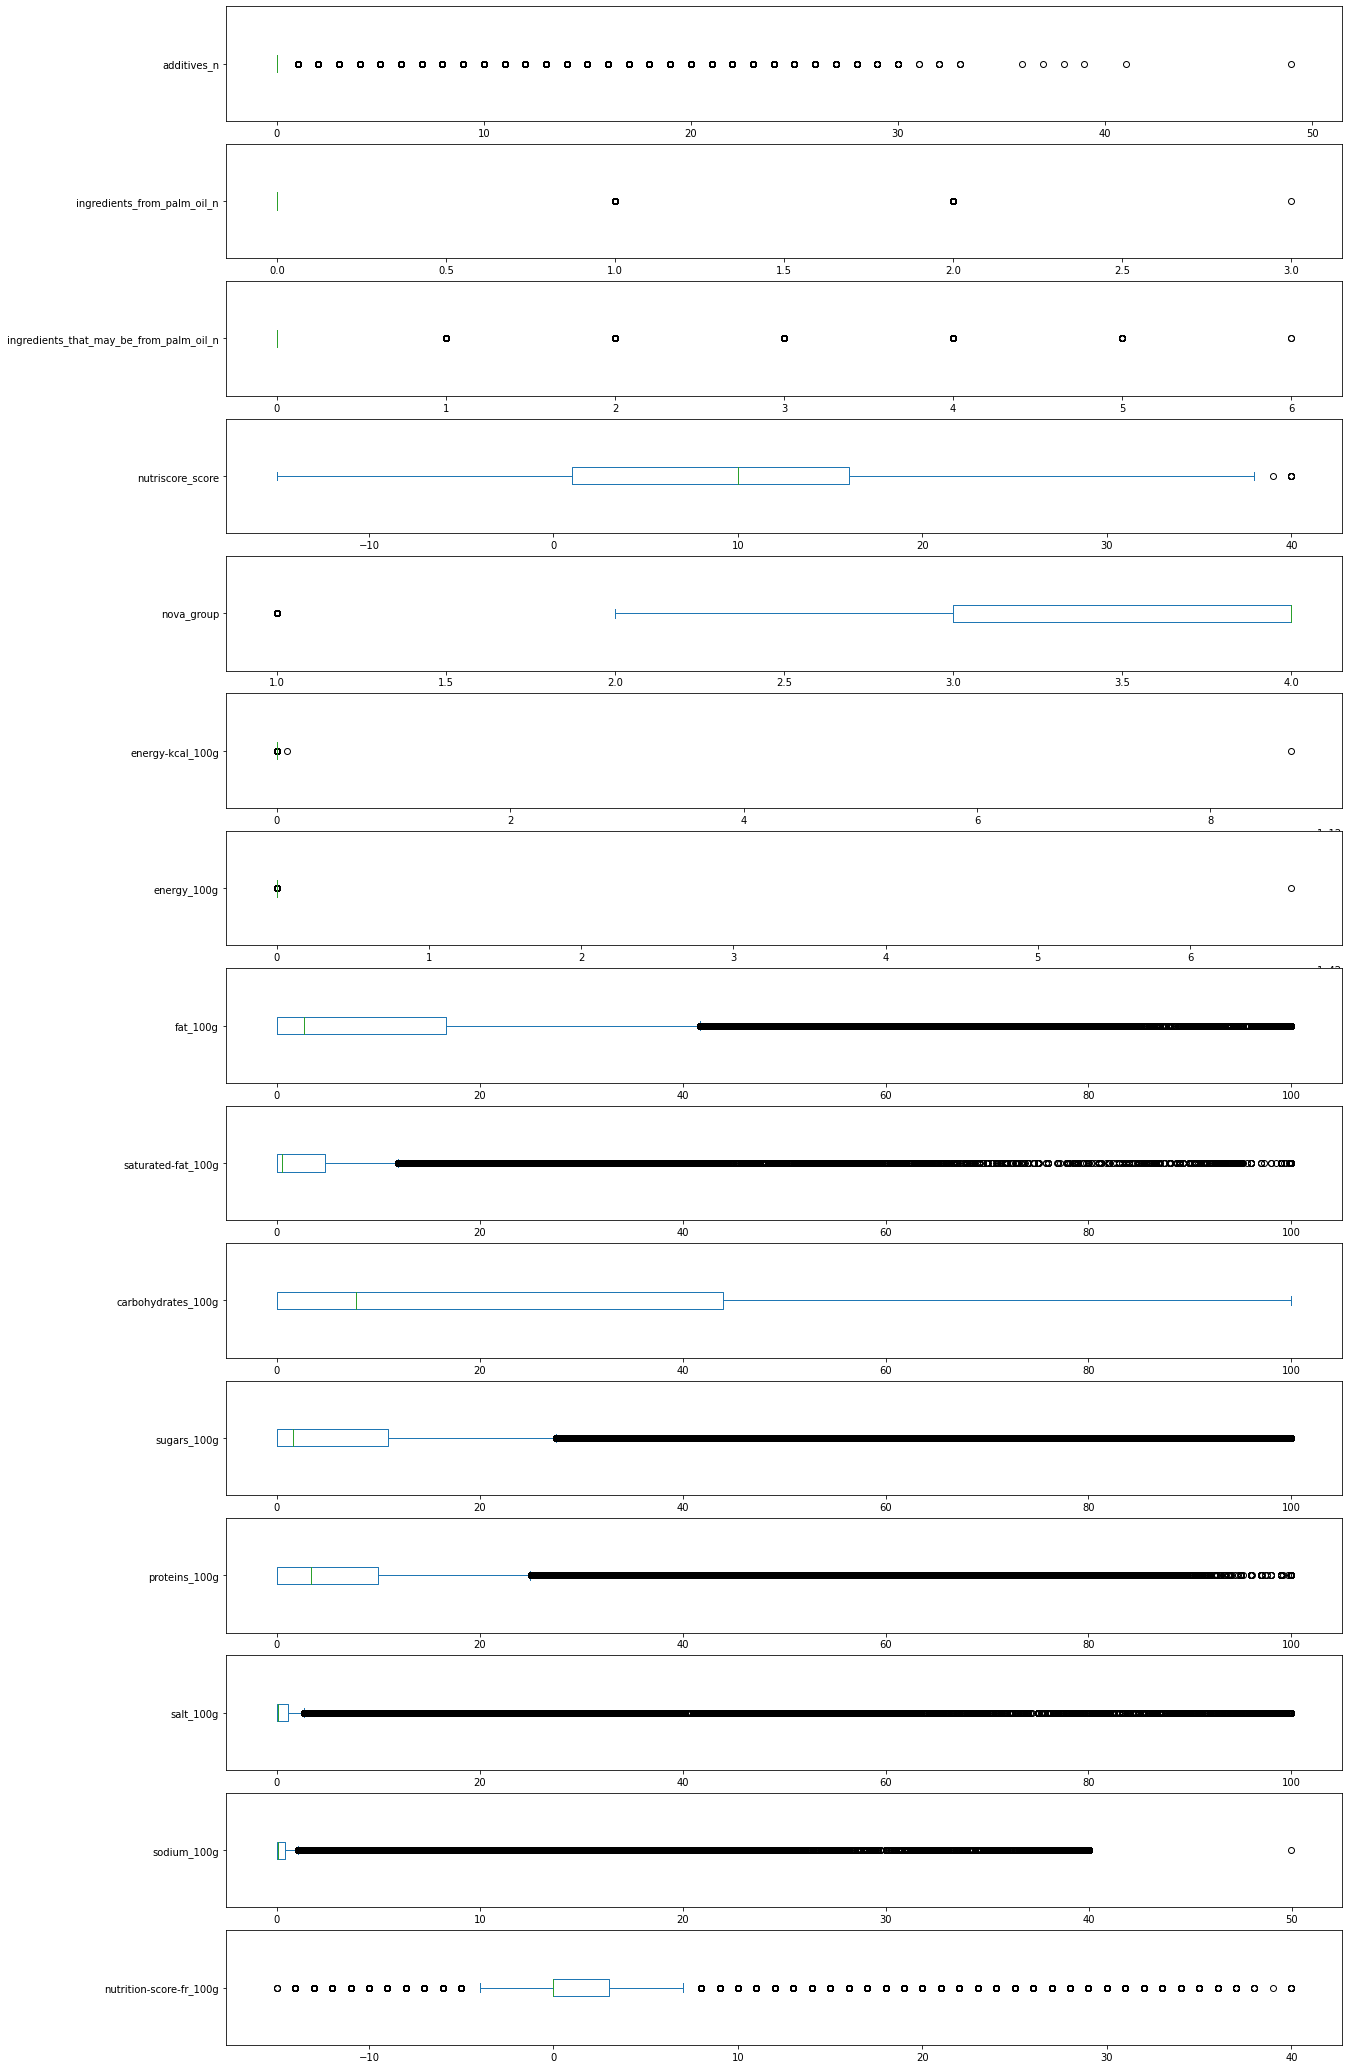

In [9]:
plotBoxes(df, df.select_dtypes('float').columns)

We see that in fact, almost all of the quantitative features have outliers, so we'll have to remove them

Also, we can see some features are in fact categorical features:
* nova_group
* ingredients_from_palm_oil_n
* ingredients_that_may_be_from_palm_oil_n

We should convert them to panda.categories for convenience

Some others are not continuous values:
* additives_n

lastly, for all the others, we can be confident to replace NaN values by number 0.0, but most of them have already been processed on previous stage

In [10]:
df['nova_group'] = df['nova_group'].astype('category')
df['ingredients_from_palm_oil_n'] = df['ingredients_from_palm_oil_n'].astype('category')
df['ingredients_that_may_be_from_palm_oil_n'] = df['ingredients_that_may_be_from_palm_oil_n'].astype('category')

In [11]:
quantis_continuous = quantis.drop(['nova_group','ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'additives_n'])
df[quantis_continuous].fillna(value=0.0, inplace=True)

Let's see graphically the distribution of the features

distribution of values


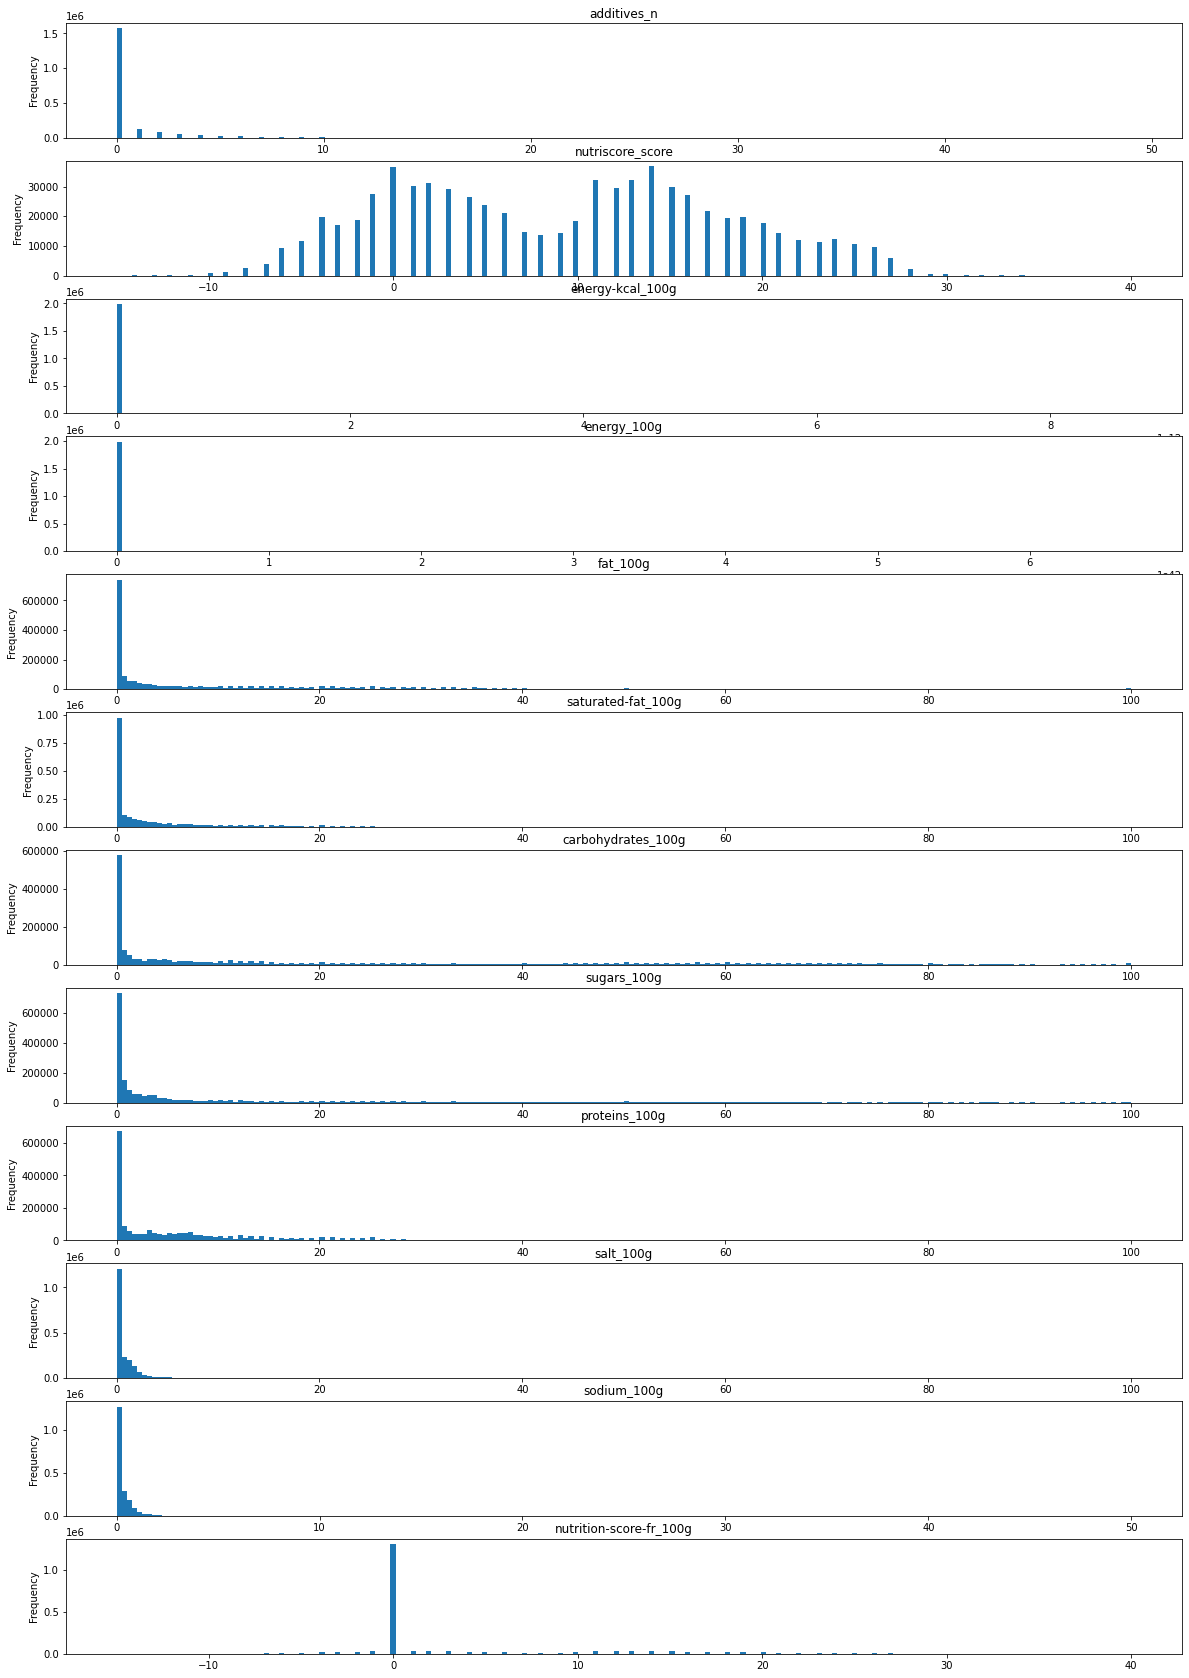

In [12]:
plotDist(df, df.select_dtypes('float').columns)

Reminder, what are the rates of missing values for these features ?

In [13]:
(df.select_dtypes('float').isna().mean().sort_values()) * 100

additives_n                0.00
energy-kcal_100g           0.00
energy_100g                0.00
fat_100g                   0.00
saturated-fat_100g         0.00
carbohydrates_100g         0.00
sugars_100g                0.00
proteins_100g              0.00
salt_100g                  0.00
sodium_100g                0.00
nutrition-score-fr_100g    0.00
nutriscore_score          63.82
dtype: float64

Let's apply our function to remove the outliers

We have implemented two methods in our custom library : Z-Score and IQ Range

Let's consider feature having outliers if they have `std > 10`

********************** TODO voir mes notes apres le meeting avec Ben ****************************

In [16]:
has_Outliers = df.select_dtypes('float').std() > 10
has_Outliers.index[has_Outliers].values

array(['energy-kcal_100g', 'energy_100g', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g'], dtype=object)

In [17]:
removeOutliers(df, has_Outliers.index[has_Outliers].values)

Now that outliers are removed, let's see the results

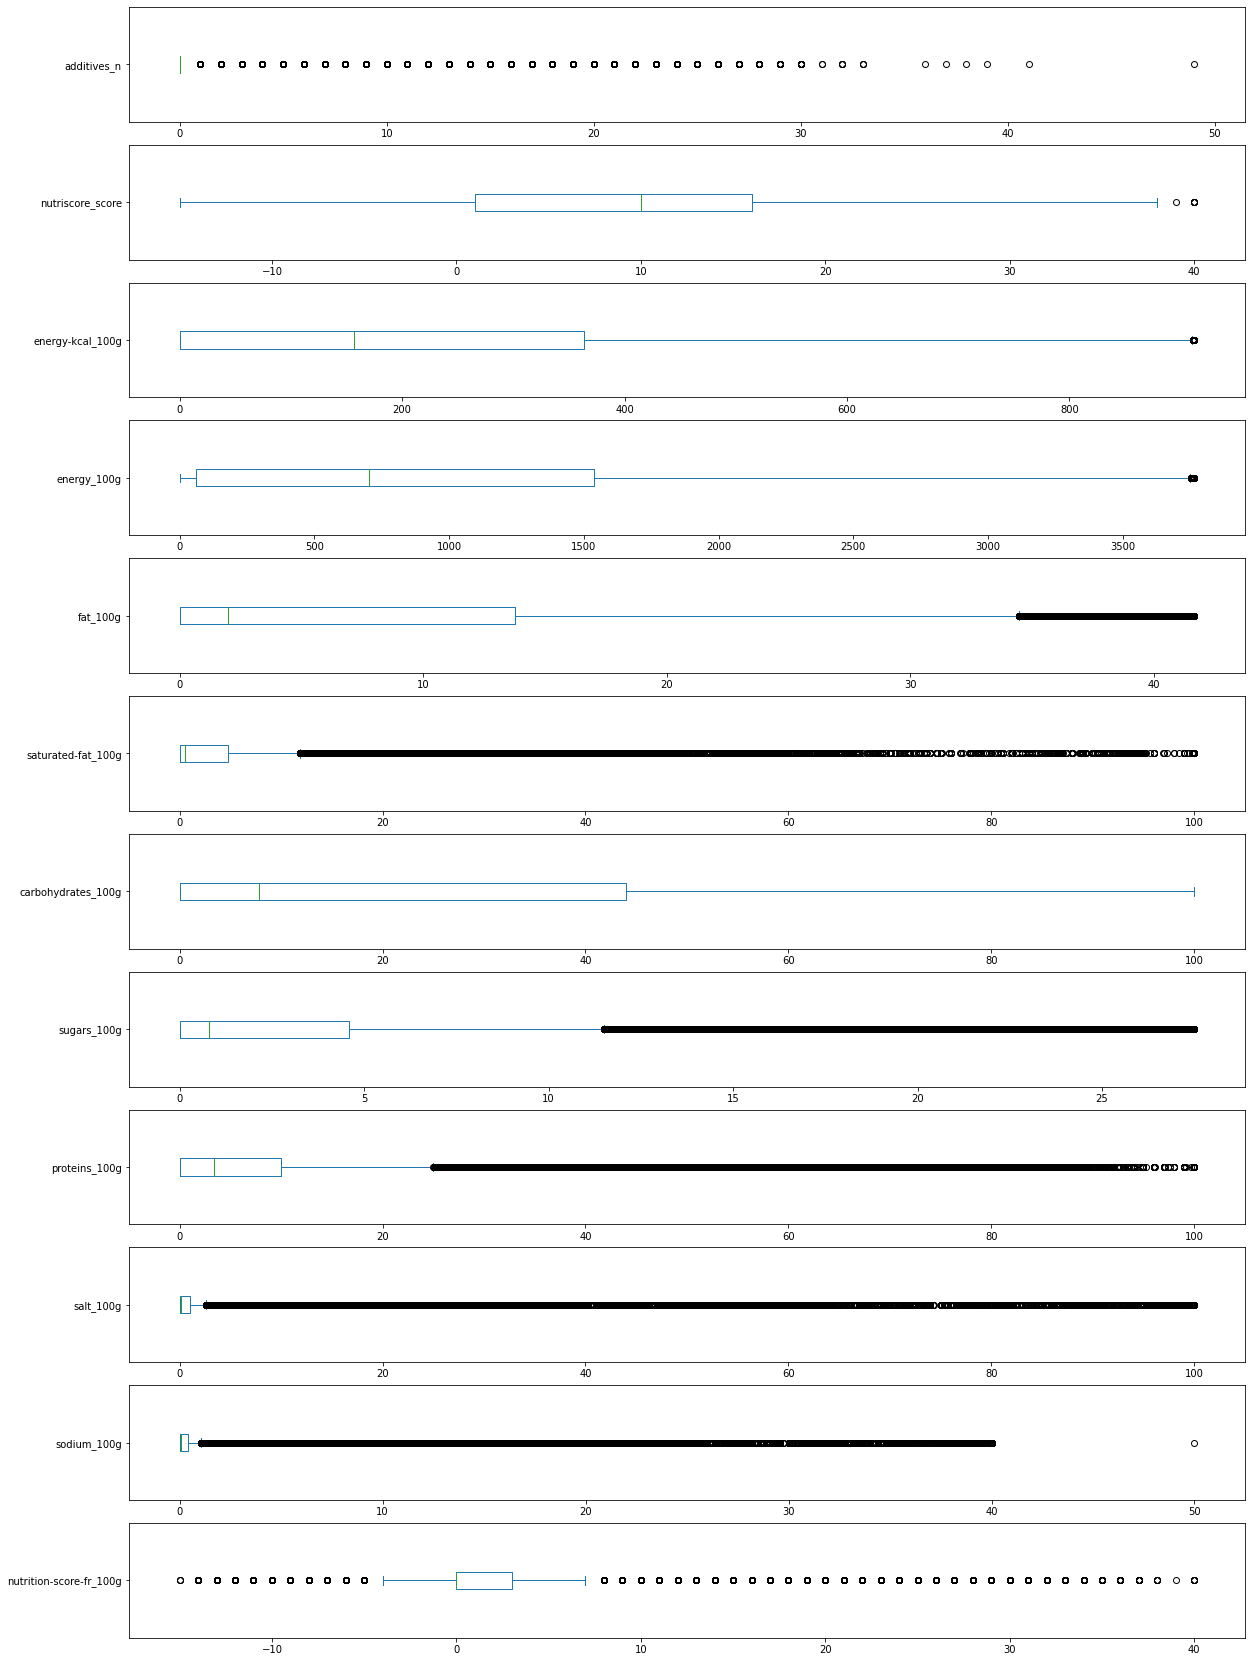

In [18]:
plotBoxes(df, df.select_dtypes('float').columns)

This is way better, despite some outliers are still present.

let's see the distributions

In [10]:
%run ./module_P2_utils.ipynb

distribution of values


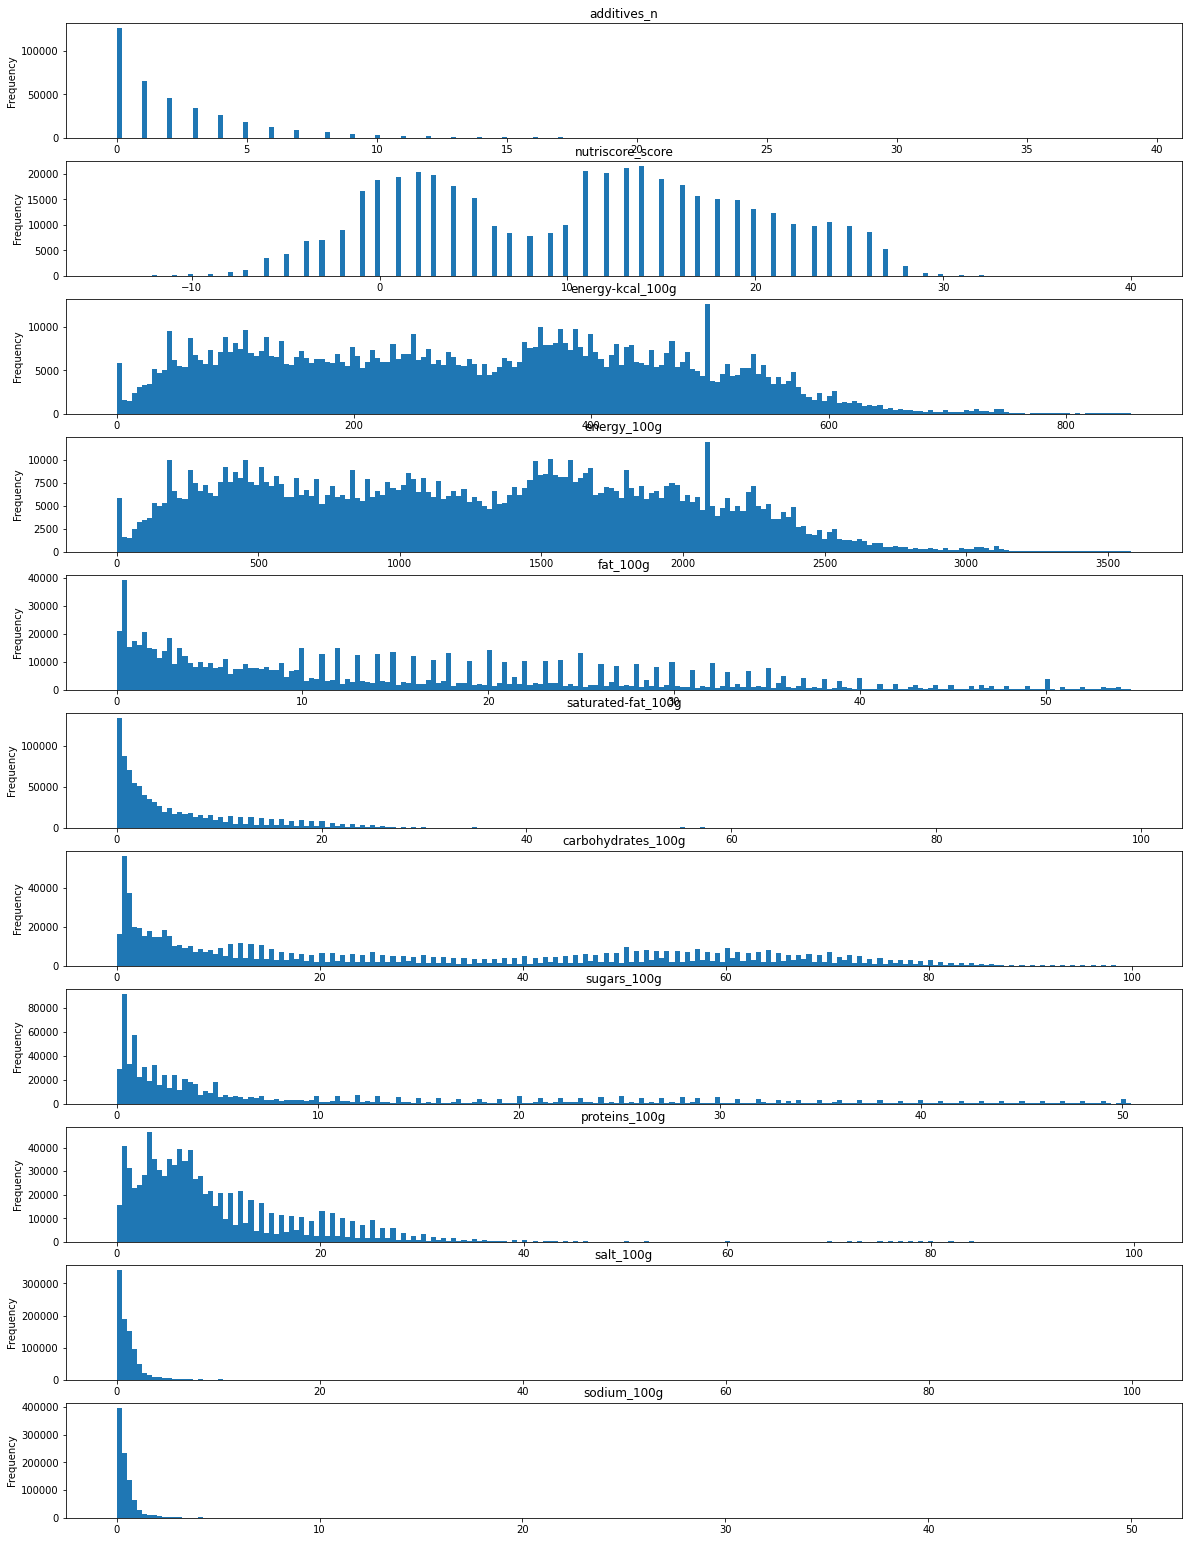

In [18]:
plotDist(df, df.select_dtypes('float').columns)

In [19]:
df.select_dtypes('float').agg(agg_func).T

,std,skew,kurtosis,mean,median,var,mad,prod,sum
additives_n,2.00,4.17,24.10,0.74,0.00,4.01,1.17,0.00,"1,465,271.00"
nutriscore_score,8.84,0.10,-0.94,9.10,10.00,78.16,7.63,-0.00,"6,542,034.00"
energy-kcal_100g,202.93,0.76,-0.15,207.31,157.00,"41,181.97",174.40,0.00,"410,685,614.95"
energy_100g,831.60,0.67,-0.40,884.76,703.00,"691,557.16",718.21,0.00,"1,747,192,673.29"
fat_100g,10.86,1.29,0.48,8.04,2.00,117.89,8.89,0.00,"15,184,434.65"
saturated-fat_100g,7.15,3.82,26.63,3.89,0.50,51.11,4.74,0.00,"7,724,286.58"
carbohydrates_100g,27.35,1.03,-0.32,22.14,7.80,748.02,23.39,0.00,"43,981,371.51"
sugars_100g,6.28,2.03,3.40,3.86,0.80,39.49,4.53,0.00,"6,600,955.12"
proteins_100g,9.48,2.78,13.66,6.83,3.40,89.83,6.75,0.00,"13,578,221.88"
salt_100g,4.08,15.90,315.17,1.00,0.13,16.68,1.21,0.00,"1,991,804.49"


In [20]:
df.select_dtypes('float').describe().T

(compute_sliced_len pid=665961) 


,count,mean,std,min,25%,50%,75%,max
additives_n,"1,986,910.00",0.74,2.00,0.00,0.00,0.00,0.00,49.00
nutriscore_score,"718,885.00",9.10,8.84,-15.00,1.00,10.00,16.00,40.00
energy-kcal_100g,"1,980,987.00",207.31,202.93,0.00,0.00,157.00,364.00,912.28
energy_100g,"1,974,772.00",884.76,831.60,0.00,59.00,703.00,"1,536.00","3,765.00"
fat_100g,"1,889,524.00",8.04,10.86,0.00,0.00,2.00,13.79,41.67
saturated-fat_100g,"1,986,910.00",3.89,7.15,0.00,0.00,0.50,4.76,100.00
carbohydrates_100g,"1,986,910.00",22.14,27.35,0.00,0.00,7.80,44.00,100.00
sugars_100g,"1,710,356.00",3.86,6.28,0.00,0.00,0.80,4.60,27.50
proteins_100g,"1,986,910.00",6.83,9.48,0.00,0.00,3.40,10.00,100.00
salt_100g,"1,986,910.00",1.00,4.08,0.00,0.00,0.13,1.06,100.00


Now the figures are more consistent

In [21]:
df.to_csv("./tmp/df_02_quanti.csv")

## Analysis

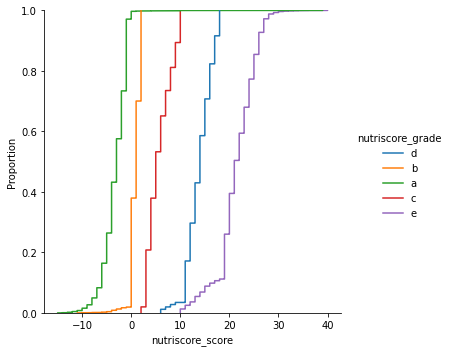

In [22]:
sns.displot(data=df, hue='nutriscore_grade', x='nutriscore_score', kind='ecdf')

We can see nutriscore grade and score are highly correlated, but some values are overlapping, so we may expect it difficult to make any projections thanks to it.

Pearson Correlation coefficient

In [28]:
df.corr(method="pearson")

(apply_list_of_funcs pid=665959) 


,Unnamed: 0,additives_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
Unnamed: 0,1.00,-0.24,-0.01,-0.02,-0.02,-0.03,-0.02,-0.04,-0.04,-0.04,-0.04,-0.04,-0.13
additives_n,-0.24,1.00,0.19,0.07,0.09,0.07,0.02,0.18,0.16,-0.04,0.01,0.01,0.30
nutriscore_score,-0.01,0.19,1.00,0.51,0.58,0.67,0.57,0.24,0.18,0.09,0.15,0.15,1.00
energy-kcal_100g,-0.02,0.07,0.51,1.00,0.97,0.70,0.57,0.53,0.23,0.36,0.03,0.03,0.37
energy_100g,-0.02,0.09,0.58,0.97,1.00,0.73,0.60,0.57,0.25,0.38,0.03,0.03,0.40
fat_100g,-0.03,0.07,0.67,0.70,0.73,1.00,0.83,0.20,0.16,0.38,0.06,0.06,0.45
saturated-fat_100g,-0.02,0.02,0.57,0.57,0.60,0.83,1.00,0.06,0.09,0.24,0.02,0.02,0.40
carbohydrates_100g,-0.04,0.18,0.24,0.53,0.57,0.20,0.06,1.00,0.43,0.00,-0.01,-0.01,0.21
sugars_100g,-0.04,0.16,0.18,0.23,0.25,0.16,0.09,0.43,1.00,-0.02,-0.01,-0.01,0.19
proteins_100g,-0.04,-0.04,0.09,0.36,0.38,0.38,0.24,0.00,-0.02,1.00,0.09,0.09,0.13


In [27]:
correlations = df.select_dtypes('float').corr(method="pearson")
correlations = np.abs(correlations)
correlations

,additives_n,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
additives_n,1.00,0.19,0.07,0.09,0.07,0.02,0.18,0.16,0.04,0.01,0.01,0.30
nutriscore_score,0.19,1.00,0.51,0.58,0.67,0.57,0.24,0.18,0.09,0.15,0.15,1.00
energy-kcal_100g,0.07,0.51,1.00,0.97,0.70,0.57,0.53,0.23,0.36,0.03,0.03,0.37
energy_100g,0.09,0.58,0.97,1.00,0.73,0.60,0.57,0.25,0.38,0.03,0.03,0.40
fat_100g,0.07,0.67,0.70,0.73,1.00,0.83,0.20,0.16,0.38,0.06,0.06,0.45
saturated-fat_100g,0.02,0.57,0.57,0.60,0.83,1.00,0.06,0.09,0.24,0.02,0.02,0.40
carbohydrates_100g,0.18,0.24,0.53,0.57,0.20,0.06,1.00,0.43,0.00,0.01,0.01,0.21
sugars_100g,0.16,0.18,0.23,0.25,0.16,0.09,0.43,1.00,0.02,0.01,0.01,0.19
proteins_100g,0.04,0.09,0.36,0.38,0.38,0.24,0.00,0.02,1.00,0.09,0.09,0.13
salt_100g,0.01,0.15,0.03,0.03,0.06,0.02,0.01,0.01,0.09,1.00,1.00,0.07


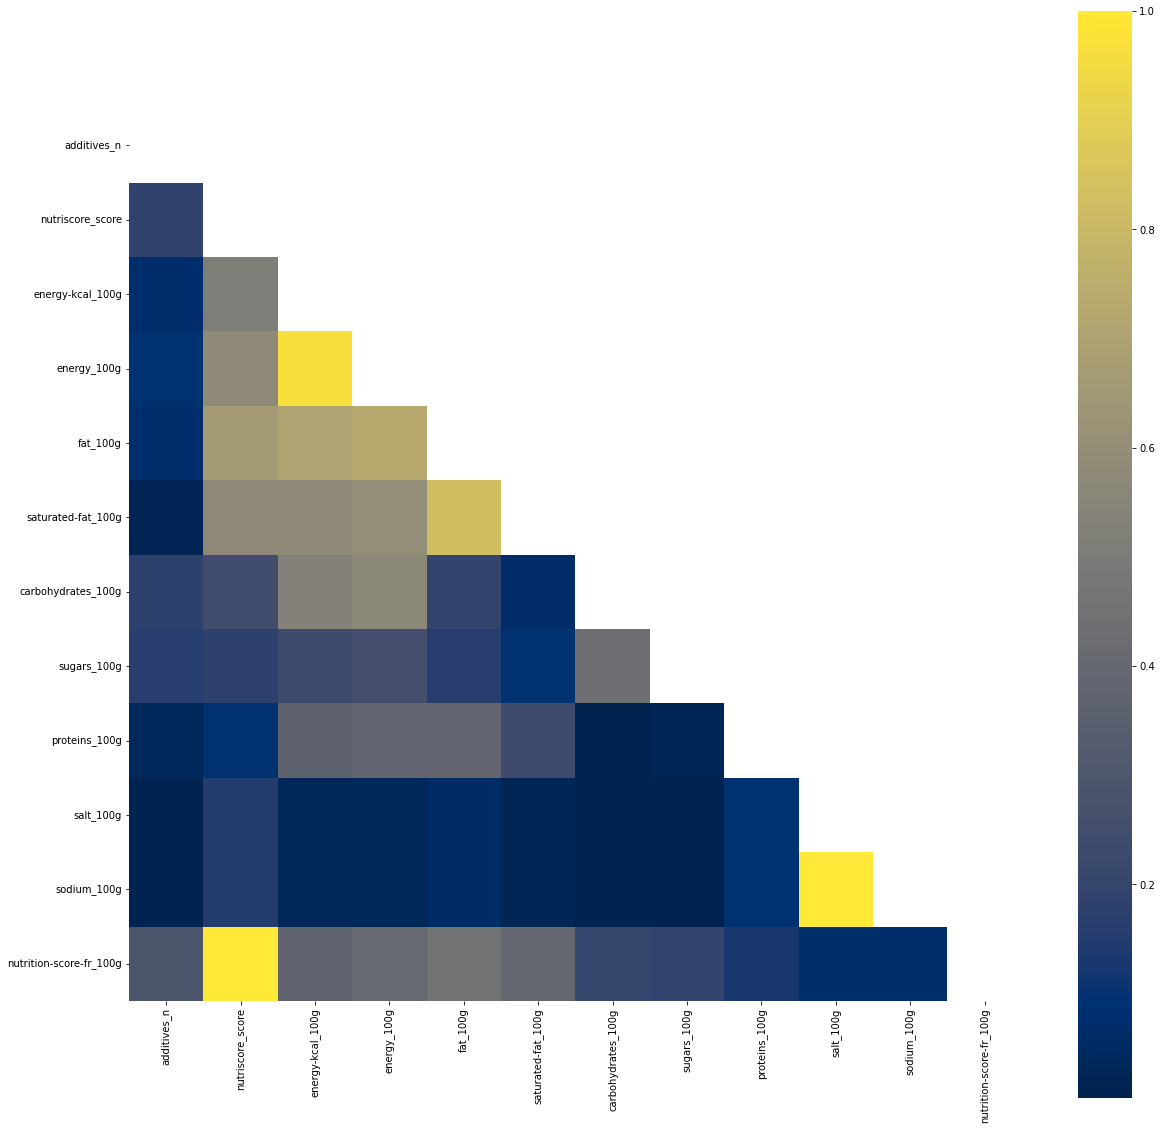

In [29]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
f, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(correlations, mask=mask, vmax=1, square=True, xticklabels=correlations.columns, yticklabels=correlations.columns, cmap='cividis')

We can see that most correlated values are
* energy_100g and energy-kcal_100g
* nutriscore_score and nutriscore-score-fr_100g

which was indeed predictable

In [2]:
df = pd.read_csv("./tmp/df_02_quanti.csv")

In [ ]:
sns.pairplot(df.select_dtypes('float'))

Show duplicates

In [5]:
df.loc[df.duplicated(['code'])]

,Unnamed: 0,Unnamed: 0.1,code,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,categories,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
281454,281454,281860,9542031695,foodrepo,2019-01-29 13:03:30+00:00,2019-08-28 16:02:29+00:00,Dark chocolate,Lindt excellence,lindt-excellence,NaN,...,0.0,0.0,0.000,0.00,0.00,0.00,0.00,0.0000,0.000,0.0
339423,339423,339897,273,openfoodfacts-contributors,2018-09-14 20:19:55+00:00,2018-09-14 20:19:56+00:00,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000,0.00,0.00,0.00,0.00,0.0000,0.000,0.0
372135,372135,372678,637480006835,usda-ndb-import,2017-03-10 10:14:30+00:00,2020-04-22 19:34:44+00:00,French Vanilla Shake,Atkins Nutritionals Inc.,atkins-nutritionals-inc,Beverages,...,49.0,205.0,2.770,0.62,0.62,0.31,4.62,0.1625,0.065,6.0
373321,373321,373867,639192720092,usda-ndb-import,2017-03-09 13:27:38+00:00,2020-04-22 18:33:16+00:00,"Chng Kee's, Sambal Oelek",Sin Hwa Foodstuff Industries Pte Ltd,sin-hwa-foodstuff-industries-pte-ltd,"Groceries, Sauces",...,263.0,1100.0,6.670,3.33,46.67,16.67,3.33,3.1925,1.277,14.0
374277,374277,374834,643126040118,waistline-app,2021-05-14 16:56:25+00:00,2021-05-14 16:56:26+00:00,Banana,Dole,dole,NaN,...,98.3,411.0,0.261,0.00,23.00,15.80,0.00,0.0000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986064,1986064,1987630,99,marilyn,2019-04-01 02:55:25+00:00,2019-06-28 14:17:40+00:00,Boulettes de soja à l’italienne,Thiriet,thiriet,Surgelés,...,191.0,799.0,11.000,2.00,5.00,2.00,15.00,0.0000,0.000,-7.0
1986641,1986641,1988207,99482417369,kiliweb,2019-05-29 15:13:03+00:00,2019-05-29 15:13:03+00:00,Ginger cookie,NaN,NaN,NaN,...,0.0,0.0,0.000,0.00,0.00,0.00,0.00,0.0000,0.000,0.0
1986642,1986642,1988208,99482421311,kiliweb,2019-05-12 01:55:02+00:00,2019-05-12 01:55:02+00:00,365 Everday Value Organic Chocolate Chip Cookies,NaN,NaN,NaN,...,500.0,2092.0,26.600,11.60,63.30,NaN,6.60,4.0000,1.600,0.0
1986643,1986643,1988209,99482424534,kiliweb,2019-05-26 05:15:02+00:00,2019-05-26 05:15:03+00:00,Organic whole wheat buttermilk pancake and waf...,NaN,NaN,NaN,...,325.0,1360.0,1.000,0.00,72.00,0.00,10.00,1.0000,0.400,0.0


In [6]:
df.loc[df.code == '9542031695']

,Unnamed: 0,Unnamed: 0.1,code,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,categories,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
4352,4352,4360,9542031695,kiliweb,2018-04-07 12:43:13+00:00,2021-08-08 17:27:34+00:00,Excellence cocoa dark chocolate bar,Lindt,lindt,"Snacks,Sweet snacks,Cocoa and its products,Con...",...,566.666667,2371.0,NaN,30.0,36.666667,16.666667,10.0,0.0,0.0,15.0
281454,281454,281860,9542031695,foodrepo,2019-01-29 13:03:30+00:00,2019-08-28 16:02:29+00:00,Dark chocolate,Lindt excellence,lindt-excellence,NaN,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


********** WIP *********

In [34]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_1'] )

col_0,Alcoholic beverages,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,unknown
row_0,,,,,,,,,,,
a,1,4474,31520,6949,2696,12563,31084,9058,1750,1217,13582
b,1,8781,14229,13805,4166,12325,5238,14664,2427,2595,15439
c,10,9711,15029,16983,21129,17372,7256,16225,8725,12861,29402
d,21,7385,11844,12244,18647,29238,1046,39222,12269,49799,41966
e,11,15097,2211,1575,9707,16569,114,5011,5301,57869,18472


In [36]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_2'] )

col_0,Alcoholic beverages,Appetizers,Artificially sweetened beverages,Biscuits and cakes,Bread,Breakfast cereals,Cereals,Cheese,Chocolate products,Dairy desserts,...,Salty and fatty products,Sandwiches,Soups,Sweetened beverages,Sweets,Teas and herbal teas and coffees,Unsweetened beverages,Vegetables,Waters and flavored waters,unknown
row_0,,,,,,,,,,,,,,,,,,,,,
a,1,205,71,553,4434,2287,18749,608,9,1140,...,205,308,397,70,642,2,0,21021,3298,13582
b,1,573,1525,939,5681,1270,5312,917,21,1031,...,615,714,1311,979,1583,214,1533,2095,718,15439
c,10,3076,1109,5336,6217,2818,4563,3990,142,3027,...,2755,1119,823,897,7100,202,1474,1883,119,29402
d,21,5577,1213,22174,3796,2283,5011,32386,2065,824,...,5500,1648,40,2250,23110,468,1261,291,50,41966
e,11,1393,1057,27972,293,165,1486,3721,11155,102,...,3675,131,11,8846,16250,251,3278,33,36,18472


In [32]:
grades = df['nutriscore_grade'].dropna().unique()
grades
# fig, ax = plt.subplots(1, grades.size, figsize=(20,10))
# for i, g in enumerate(grades):
#     ax.boxplot(df[df.nutriscore_grade == g]['energy_100g'].dropna().values , showfliers=False)
#     ax.set_title(g, fontsize=20, fontweight='bold')

array(['d', 'b', 'a', 'c', 'e'], dtype=object)

In [26]:
# TODO : dessiner le graphe de correlation, en reduisant les valeurs car sinon trop grand fail
# plt.plot(df.energy_100g, df.nutriscore_score)

Despite feature is uni mode, skew is positive and high, so Z-score method cannot be applied here

Therefore we prefer to apply IQR method.


https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

We have very rare outstanding values, so they can be classified as outliers (outliers must be rare, otherwise question of interest in the dataset must be set). They won't have statiscial impact

what to do with outliers ?
* remove lines
* replace w/ Least Absolute Deviation Method
* replace w/ Robust Statistical Method
* replace by Least Squares Method
